# B_c_2 : Exploration préliminaire des données

L'analyse préliminaire exploratoire (EDA) a déjà été débutée lors de l'importation des données pour bien comprendre ce que nous obtenions comme données d'entrée. 

Nous pousserons l'analyse un peu plus en profondeur ici. 

> The role of data exploration analysis is based on the use of objectives achieved as above. After formatting the data, the performed analysis indicates patterns and trends that help to take the proper actions required to meet the expected goals of the business. As we expect specific tasks to be done by any executive in a particular job position, it is expected that proper EDA will fully provide answers to queries related to a particular business decision. As data science involves building models for prediction, they require optimum data features to be considered by the model. Thus, EDA ensures that the correct ingredients in patterns and trends are made available for training the model to achieve the correct outcome, like a successful recipe. Therefore, carrying out the right EDA with the correct tool based on befitting data will help achieve the expected goal.  (Madhugiri, D. (2023, 14 septembre). Exploratory Data Analysis (EDA) : Types, Tools, Process. Knowledgehut upGrad. Repéré à https://www.knowledgehut.com/blog/data-science/eda-data-science
)

In [1]:
! ls ../data/interim/*.parquet

../data/interim/demande_meteo.parquet
../data/interim/hist_prev_meteo.parquet
../data/interim/historique_demande_HQ.parquet
../data/interim/quotidien_demande_HQ.parquet


Nous avons maintenant un fichier `demande_meteo.parquet` contenant toutes nos données de bases que nous pouvons utiliser pour notre analyse.

In [2]:
# %load_ext jupyter_black

import black
import jupyter_black

jupyter_black.load(
    lab=True,
    line_length=55,
    target_version=black.TargetVersion.PY311,
)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import calendar
from references import colors_pal
from src.visualization import *

plt.style.use("fivethirtyeight")

pd.options.mode.chained_assignment = None

In [4]:
path_to_interim_data = "../data/interim/"
demande_meteo_parquet = "demande_meteo.parquet"

df_import = pd.read_parquet(
    path=os.path.join(
        path_to_interim_data, demande_meteo_parquet
    ),
    engine="pyarrow",
)

Nous nous intéresserons principalement aux données complètes dans cette analyse, soit la période entre le 1er janvier 2019 et le 31 décembre 2022. 

Nous effectuerons aussi des visualisations sur une seule année.  Il semble plus facile de visualiser les tendances entre le 1er juillet et le 30 juin de l'année suivante, ce qui nous permet de voir l'hiver dans un ensemble continu. 

In [5]:
df = df_import["20190101":"20221231"]
df2122 = df_import["20210701":"20220630"]

## Analyse statistique

In [6]:
df.describe()

MW          Temp
count  35018.000000  35068.000000
mean   21516.372544      6.395369
std     5242.575770     12.039408
min    13293.750000    -30.800000
25%    17656.490000     -2.400000
50%    19755.055000      7.000000
75%    25409.287500     16.600000
max    40178.570000     33.000000

Nous pouvons voir que nous avons plus de données NaN dans la demande MW que la température.

In [7]:
df.loc[df["MW"].isnull()]

MW  Temp
date                         
2019-01-01 00:00:00 NaN   0.0
2019-03-10 02:00:00 NaN -11.0
2019-06-21 15:00:00 NaN  22.2
2019-06-21 16:00:00 NaN  22.2
2019-06-21 17:00:00 NaN  20.9
2019-06-21 18:00:00 NaN  20.0
2019-06-21 19:00:00 NaN  18.9
2019-06-21 20:00:00 NaN  17.7
2019-06-21 21:00:00 NaN  17.1
2019-06-21 22:00:00 NaN  16.4
2019-06-21 23:00:00 NaN  15.7
2019-06-22 00:00:00 NaN  15.9
2019-06-22 01:00:00 NaN  15.6
2019-06-22 02:00:00 NaN  15.1
2019-06-22 03:00:00 NaN  14.6
2019-06-22 04:00:00 NaN  14.0
2019-06-22 05:00:00 NaN  14.0
2019-06-22 06:00:00 NaN  15.1
2019-06-22 07:00:00 NaN  17.2
2019-06-22 08:00:00 NaN  19.1
2019-06-22 09:00:00 NaN  20.5
2019-06-22 10:00:00 NaN  21.4
2019-06-22 11:00:00 NaN  22.0
2019-06-22 12:00:00 NaN  22.4
2019-06-22 13:00:00 NaN  22.7
2019-06-22 14:00:00 NaN  23.7
2019-06-22 15:00:00 NaN  23.3
2019-06-22 16:00:00 NaN  23.0
2019-06-22 17:00:00 NaN  22.1
2019-06-22 18:00:00 NaN  21.5
2019-06-22 19:00:00 NaN  19.8
2019-06-22 20:00:00 NaN  18.2
2019-06-22 21:00:00 NaN  17.6
2019-06-22 22:00:00 NaN  16.8
2019-06-22 23:00:00 NaN  16.3
2019-06-23 00:00:00 NaN  15.5
2019-06-23 01:00:00 NaN  15.0
2019-06-23 02:00:00 NaN  14.6
2019-06-23 03:00:00 NaN  14.5
2019-06-23 04:00:00 NaN  14.5
2019-06-23 05:00:00 NaN  14.4
2019-06-23 06:00:00 NaN  15.2
2019-06-23 07:00:00 NaN  16.6
2019-11-11 14:00:00 NaN  -3.9
2019-11-11 15:00:00 NaN  -4.4
2019-11-11 16:00:00 NaN  -5.2
2019-11-11 17:00:00 NaN  -6.0
2020-03-08 02:00:00 NaN  -5.1
2021-03-14 02:00:00 NaN  -5.7
2022-03-13 02:00:00 NaN  -8.9

Nous pouvons voir que certaines données manquantes sont dues au changement d'heure (ex, 2019-03-10 2:00). 

Par contre, la majorité des données manquantes sont dans les environs du 22 juin 2019 : il semble y avoir eu un problème important pendant plus de 30 heures où il n'y a pas d'historique. 

In [8]:
df.loc[df["Temp"].isnull()]

Empty DataFrame
Columns: [MW, Temp]
Index: []

Il n'y a pas de données manquantes pour la température. 

### Histogramme

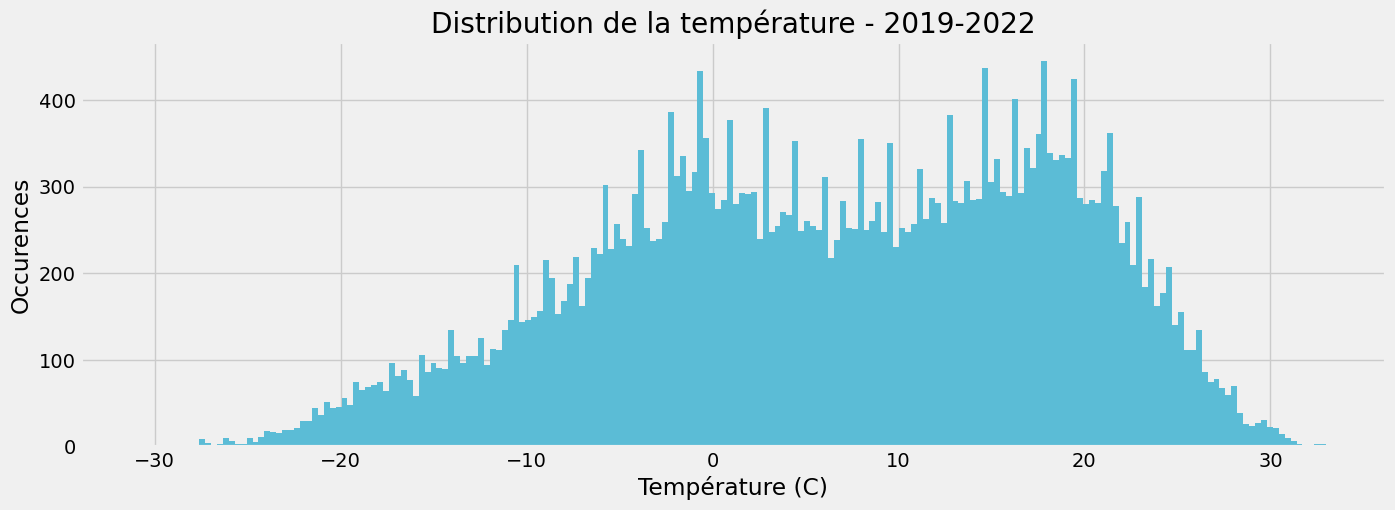

In [9]:
df["Temp"].plot.hist(
    figsize=(15, 5),
    bins=200,
    title="Distribution de la température - 2019-2022",
    xlabel="Température (C)",
    ylabel="Occurences",
    color=colors_pal[4],
)
plt.show()

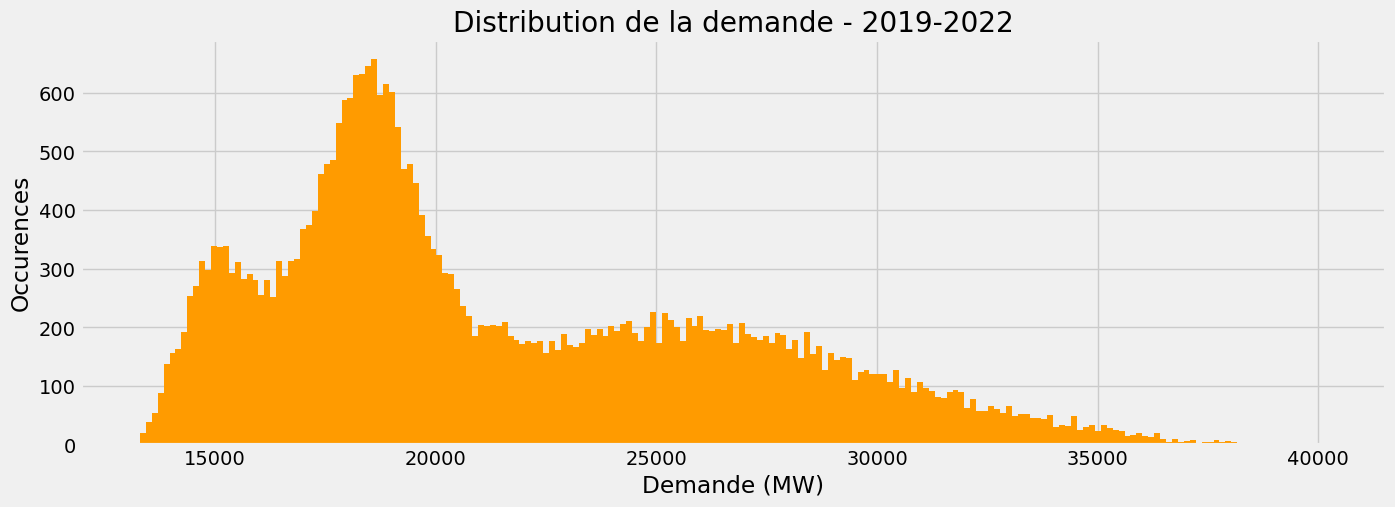

In [10]:
df["MW"].plot.hist(
    figsize=(15, 5),
    bins=200,
    title="Distribution de la demande - 2019-2022",
    xlabel="Demande (MW)",
    ylabel="Occurences",
    color=colors_pal[11],
)
plt.show()

Nous pouvons bien voir que les 2 séries ne suivent pas une distribution normale, ce qui nous devrons prendre en compte dans l'utilisation des tests statistiques. [Ref : https://blog.minitab.com/fr/que-faire-si-mes-donnees-ne-suivent-pas-une-distribution-normale]

### Boîtes à moustaches

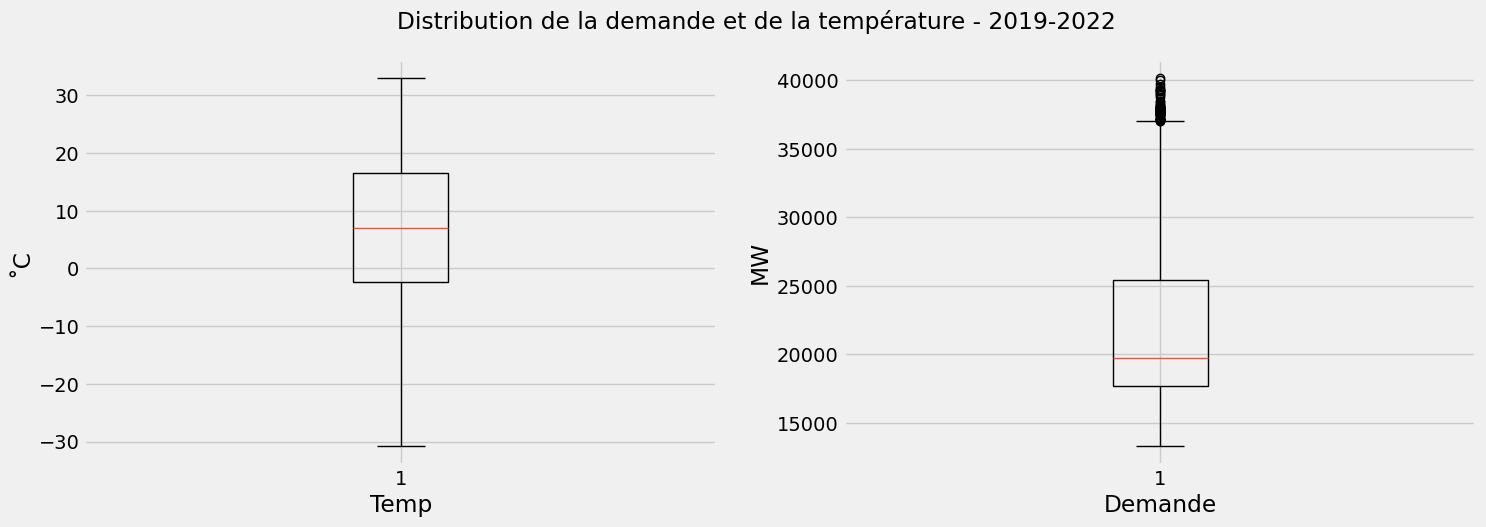

In [11]:
fig, axs = plt.subplots(
    ncols=2, nrows=1, figsize=(16, 5)
)
axs[0].boxplot(df["Temp"])
axs[0].set_xlabel("Temp")
axs[0].set_ylabel("˚C")
axs[1].boxplot(df["MW"].dropna())
axs[1].set_xlabel("Demande")
axs[1].set_ylabel("MW")

fig.suptitle(
    "Distribution de la demande et de la température - 2019-2022"
)
plt.show()

## Corrélation entre les 2 variables : Temp et demande MW

In [12]:
df["idx_Mois"] = df.index.month
df["idx_Jour"] = df.index.dayofweek

df["Mois"] = df["idx_Mois"].apply(
    lambda x: calendar.month_name[x].capitalize()
)
df["Jour"] = df["idx_Jour"].apply(
    lambda x: calendar.day_name[x].capitalize()
)

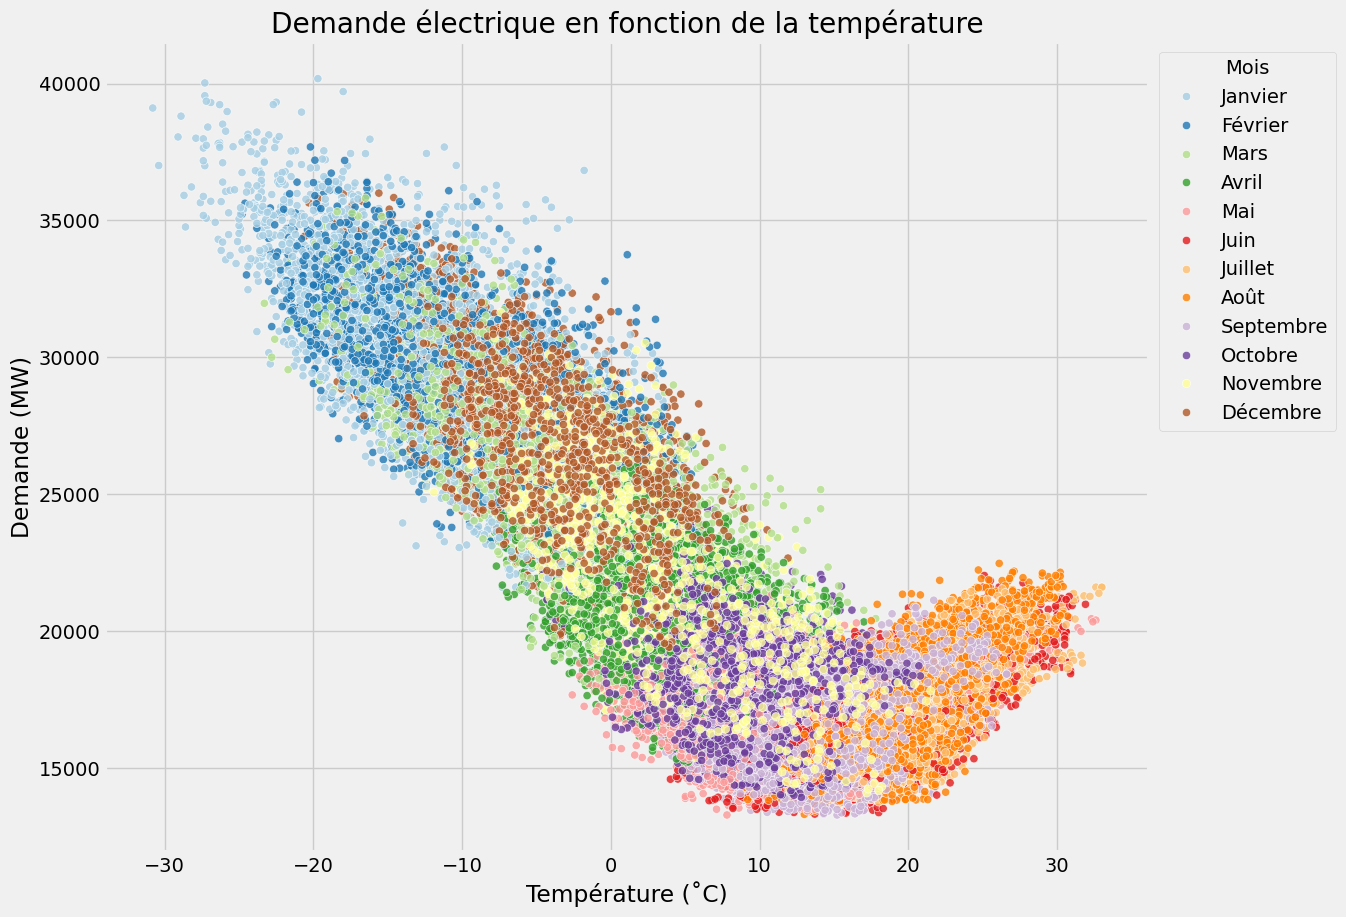

In [13]:
plt.figure(figsize=(12, 10))
sns.set_palette("Paired")
ax = sns.scatterplot(
    data=df.reset_index(drop=True),
    y="MW",
    x="Temp",
    hue="Mois",
    alpha=0.8,
)
ax.set(
    title="Demande électrique en fonction de la température",
    xlabel="Température (˚C)",
    ylabel="Demande (MW)",
)
sns.move_legend(
    ax, "upper left", bbox_to_anchor=(1, 1)
)

plt.show()

Nous pouvons bien voir une tendance entre la demande et la température, mais pas une ligne droite comme on le voit souvent. 

Nous voyons un point minimal de demande dans les environs de 10 à 18˚C, soit la température à laquelle la climatisation et le chauffage fonctionne rarement. Dans le domaine de la mécanique du bâtioment, nous faisons d'ailleurs souvent référence au Degré-Jour en base 18, soit la distance entre la température moyenne de la journée et 18 C, où les gens seront confortables sans systèmes mécaniques. (Réf : https://terminology.ashrae.org/?entry=degree%20day )  

> Il faut noter que l'ASHRAE parle de degré-jours chauffage en base 18 et degré-jours climatisation en base 21 : développer l'impact de choisir une base 18 ou 21 dans l'analyse de *features*

Il faut noter qu'à la demande demande minimale, nous ne sommes quand même pas à zéro, étant donné qu'il y a toujours une demande industrielle et d'autres charges de base dans les maisons et commerces (éclairage, équipements informatiques, eau chaude domestique, etc.) 

Effectuons une visualisation en fonction de la différence entre la température et 18C, pour voir si nous réussissons à redresser la courbe MW-Temp.

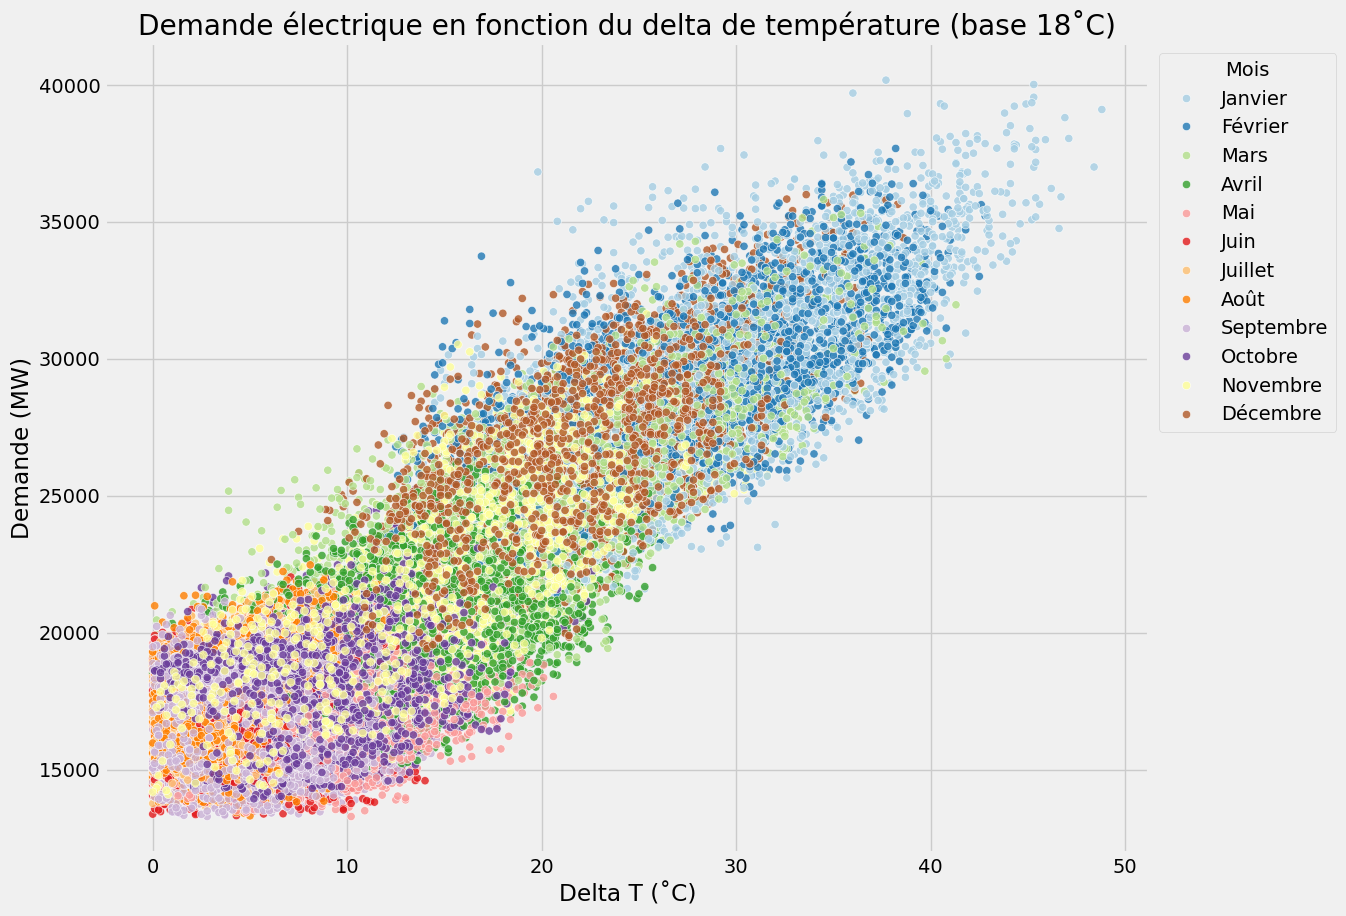

In [14]:
df_18 = df.copy()
df_18["DeltaTemp"] = abs(df_18["Temp"] - 18)

plt.figure(figsize=(12, 10))
sns.set_palette("Paired")
ax = sns.scatterplot(
    data=df_18.reset_index(drop=True),
    y="MW",
    x="DeltaTemp",
    hue="Mois",
    alpha=0.8,
)
ax.set(
    title="Demande électrique en fonction du delta de température (base 18˚C)",
    xlabel="Delta T (˚C)",
    ylabel="Demande (MW)",
)
sns.move_legend(
    ax, "upper left", bbox_to_anchor=(1, 1)
)

plt.show()

Nous pouvons bien voir que cette relation est plus linéaire. 

Nous pouvons aussi ajouter une courbe de régression à ce graphique. 

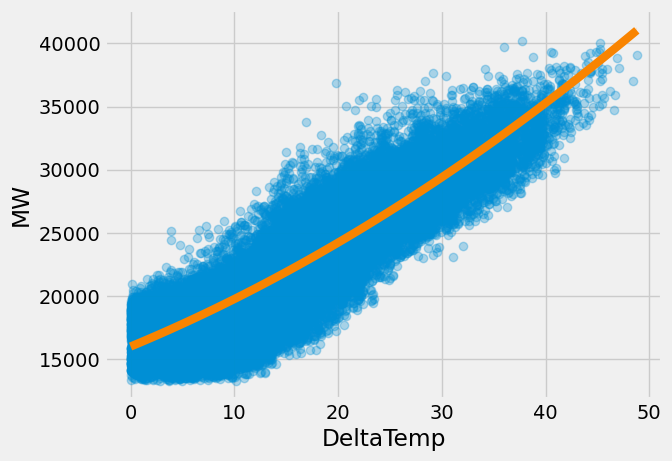

In [15]:
plt.style.use("fivethirtyeight")
sns.regplot(
    data=df_18.reset_index(drop=True),
    order=2,
    y="MW",
    x="DeltaTemp",
    line_kws=dict(color=colors_pal[3]),
    scatter_kws=dict(alpha=0.3),
)
plt.show()

Nous pouvons donc croire à ce stade que le delta T de la température sera plus intéressant que la température elle-même. 

Revoyons l'histogramme avec le delta T. 

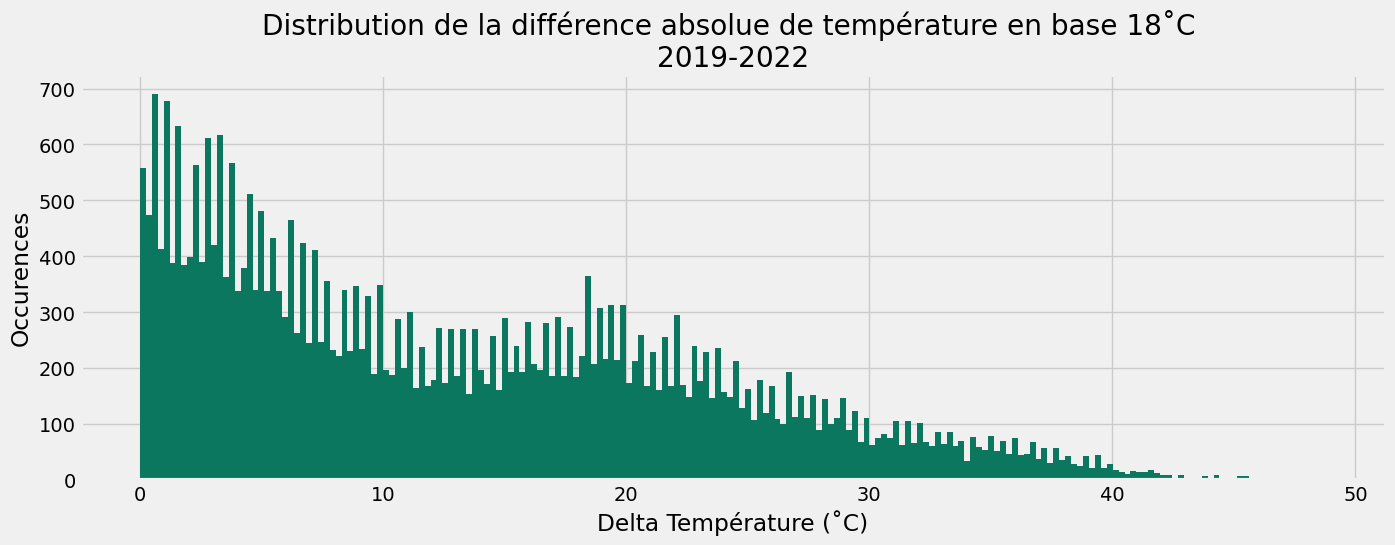

In [16]:
df_18["DeltaTemp"].plot.hist(
    figsize=(15, 5),
    bins=200,
    title="Distribution de la différence absolue de température en base 18˚C \n2019-2022",
    color=colors_pal[9],
    xlabel="Delta Température (˚C)",
    ylabel="Occurences",
)

plt.show()

Comme notre delta T est en absolue, la distribution est très élevée près de 0 et en pente descendante vers 40 et + degrés.

Voyons vois si nous éliminons l'absolue dans notre évaluation. 

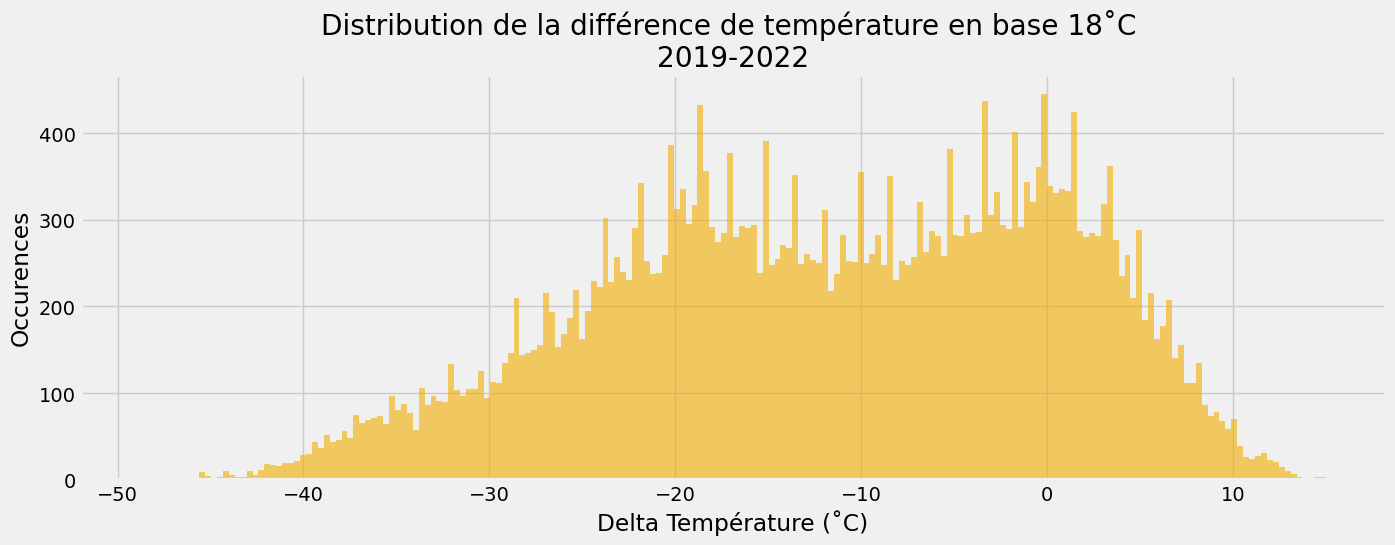

In [17]:
df_18["DeltaTempSigne"] = df_18["Temp"] - 18

df_18["DeltaTempSigne"].plot.hist(
    figsize=(15, 5),
    bins=200,
    title="Distribution de la différence de température en base 18˚C \n2019-2022",
    color=colors_pal[2],
    alpha=0.6,
    xlabel="Delta Température (˚C)",
    ylabel="Occurences",
)

plt.show()

## Visualisation de la température et de la demande électrique dans le temps (*timeseries*)

Comme nous travaillons avec une série de données dans le temps (*timeserie*), débutons avec un graphique des données en fonction de la date (axe-x).

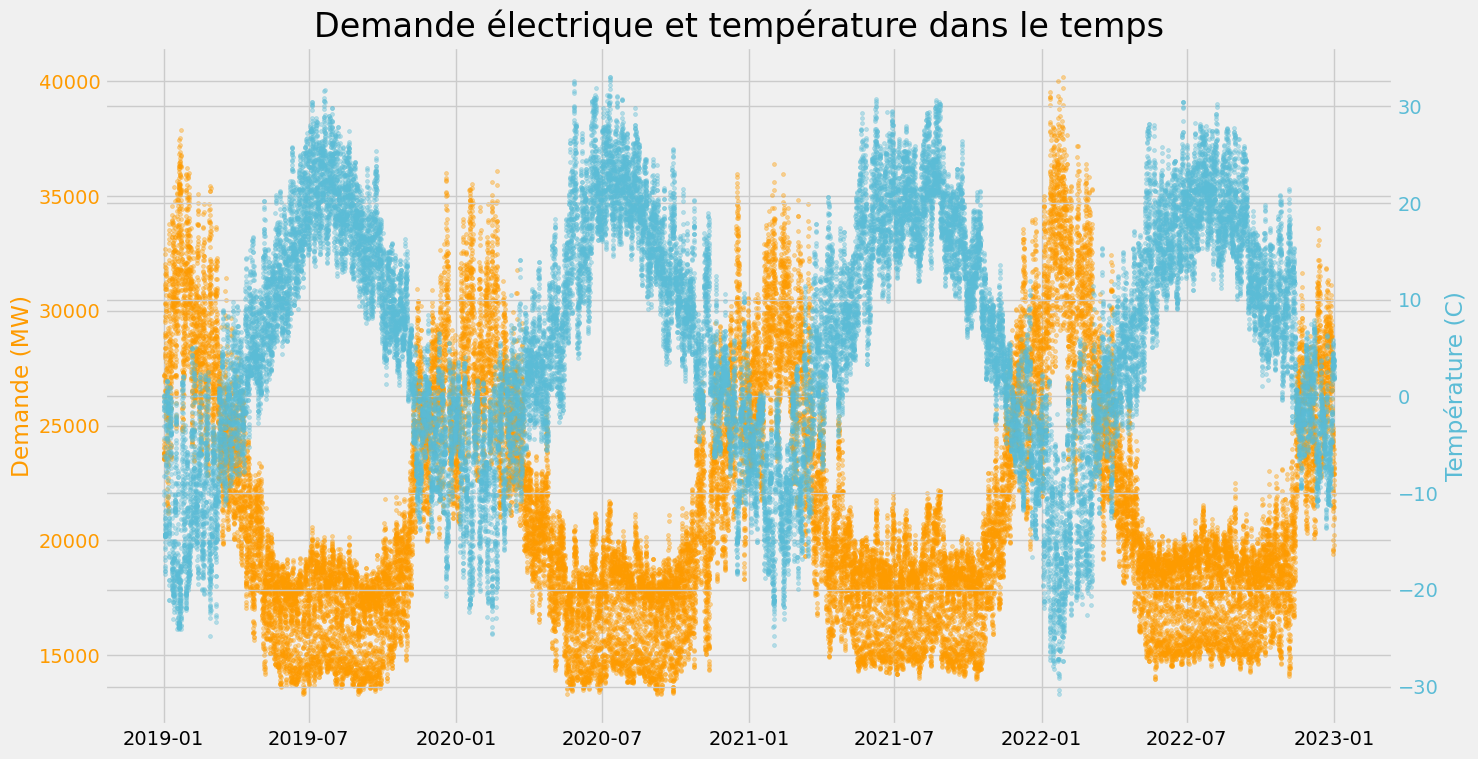

In [18]:
plot_demande_temp(df)

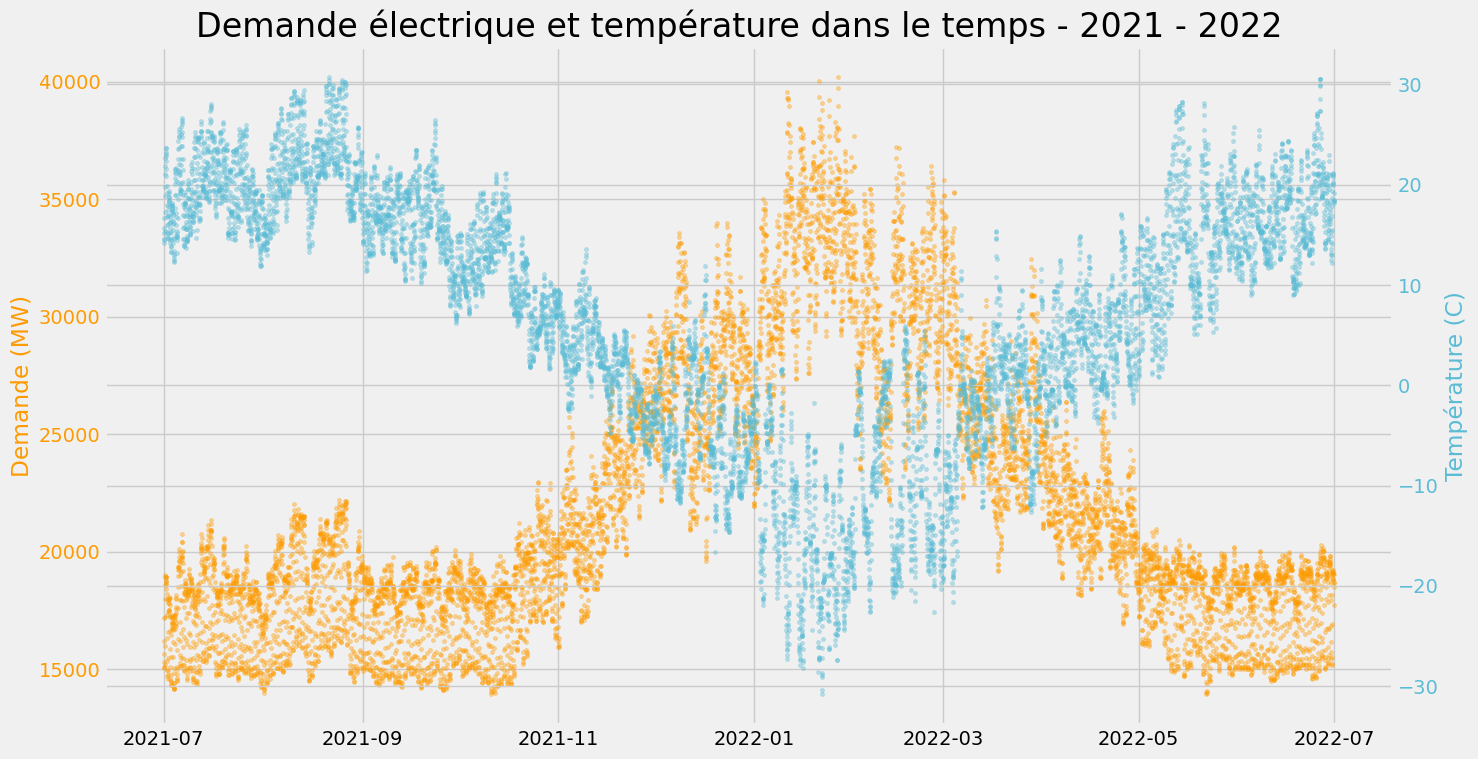

In [19]:
plot_demande_temp(df2122, fin_titre="2021 - 2022")

Nous pouvons bien voir sur le dernier graphique que la demande électrique est la plus élevée lorsque la température est très froide, les clients d'Hydro-Québec utilisant beaucoup l'électricité pour se chauffer. 

### Analyse de la période hivernale

Nous pouvons prendre une période de février 2022 pour bien observer ce phénomène.

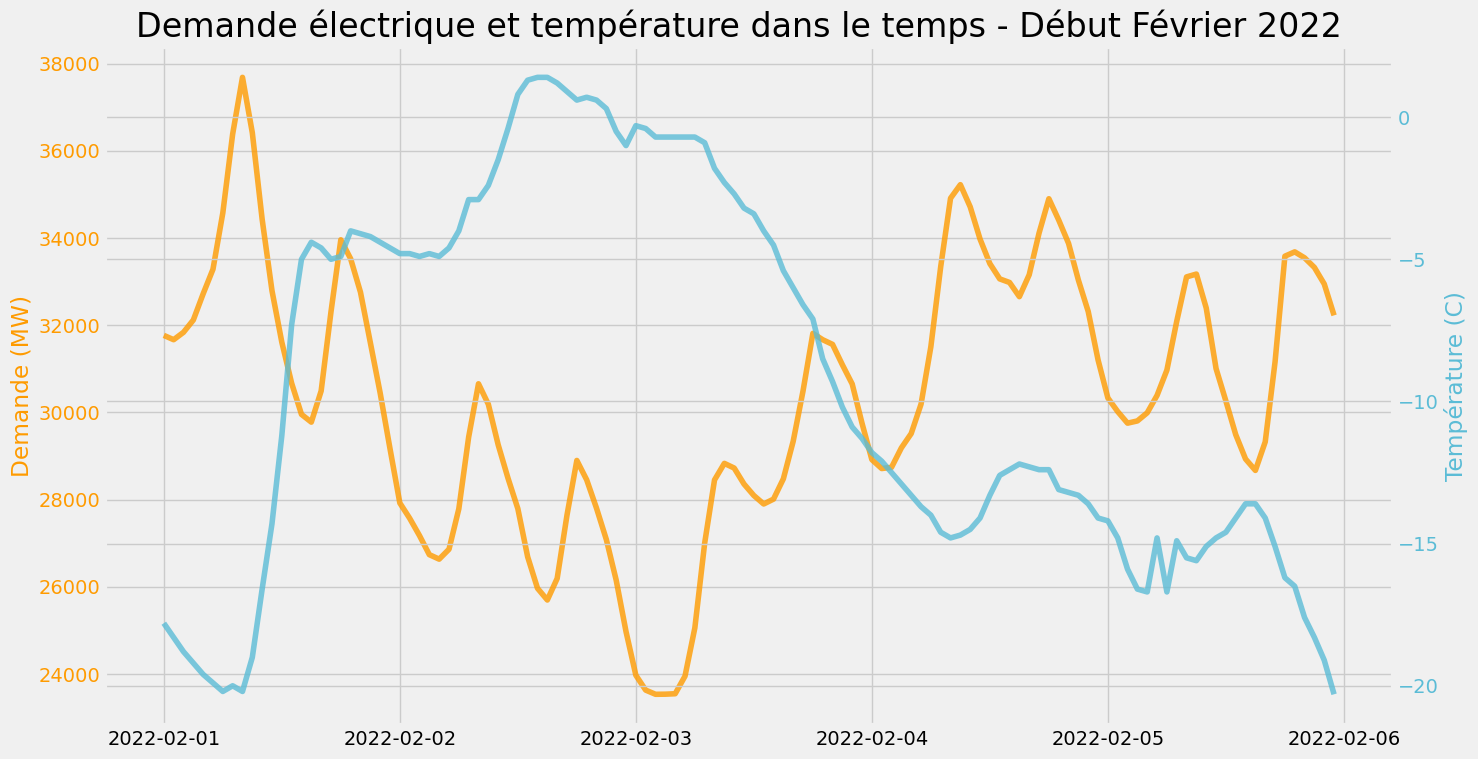

In [20]:
line_demande_temp(
    df=df_import["20220201":"20220205"],
    fin_titre="Début Février 2022",
)

À chaque jour, nous voyons la pointe du matin et la pointe de fin pm au niveau de la demande, qui sont bien marqués. Nous pouvons aussi voir une tendance plus générale qui inversement corrélé à la température.  

En effet, nous pouvons remarquer que le 1er février, il a fait en bas de -20C et la demande électrique est montée à près de 38 000 MW.  

Le 2 février, la température est montée au-delà de 0C et la demande est redescendue sous 26 000 MW. 

On peut aussi voir ici que la demande est plus faible durant la nuit, par exemple, pour les premières heures du 3 février. 

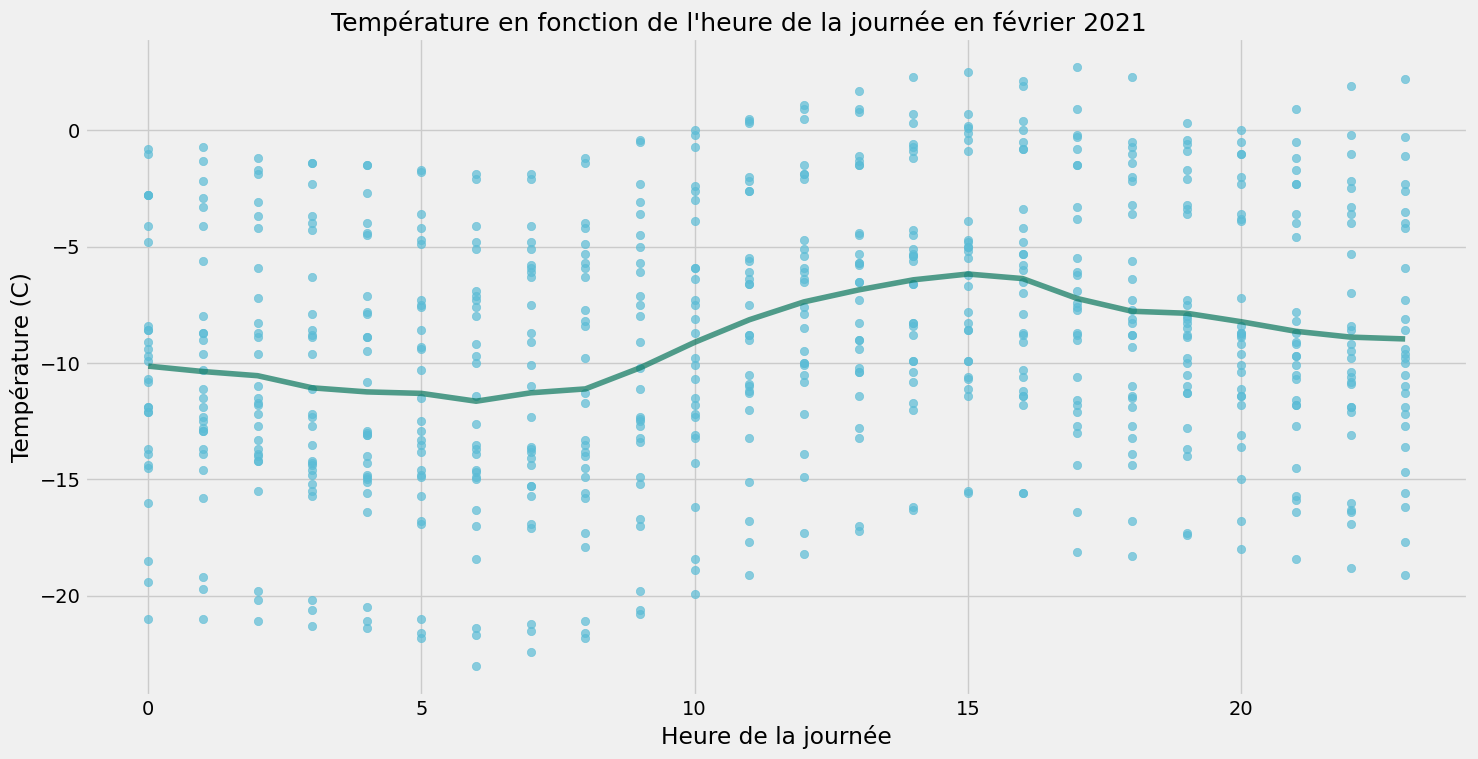

In [21]:
# Visualisation température en fonction de l'heure pour février 2021

df_fev = df_import["20210201":"20210228"].copy()

df_fev["Heures"] = df_fev.index.hour

fig, ax1 = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(15)

ax1.scatter(
    x=df_fev.Heures,
    y=df_fev.Temp,
    alpha=0.7,
    color=colors_pal[4],
)
ax1.plot(
    df_fev.groupby("Heures")["Temp"].mean(),
    alpha=0.7,
    color=colors_pal[9],
)

plt.suptitle(
    "Température en fonction de l'heure de la journée en février 2021",
    y=0.95,
    fontsize=18,
)
ax1.set_xlabel("Heure de la journée")
ax1.set_ylabel("Température (C)")
fig.tight_layout()
plt.show()

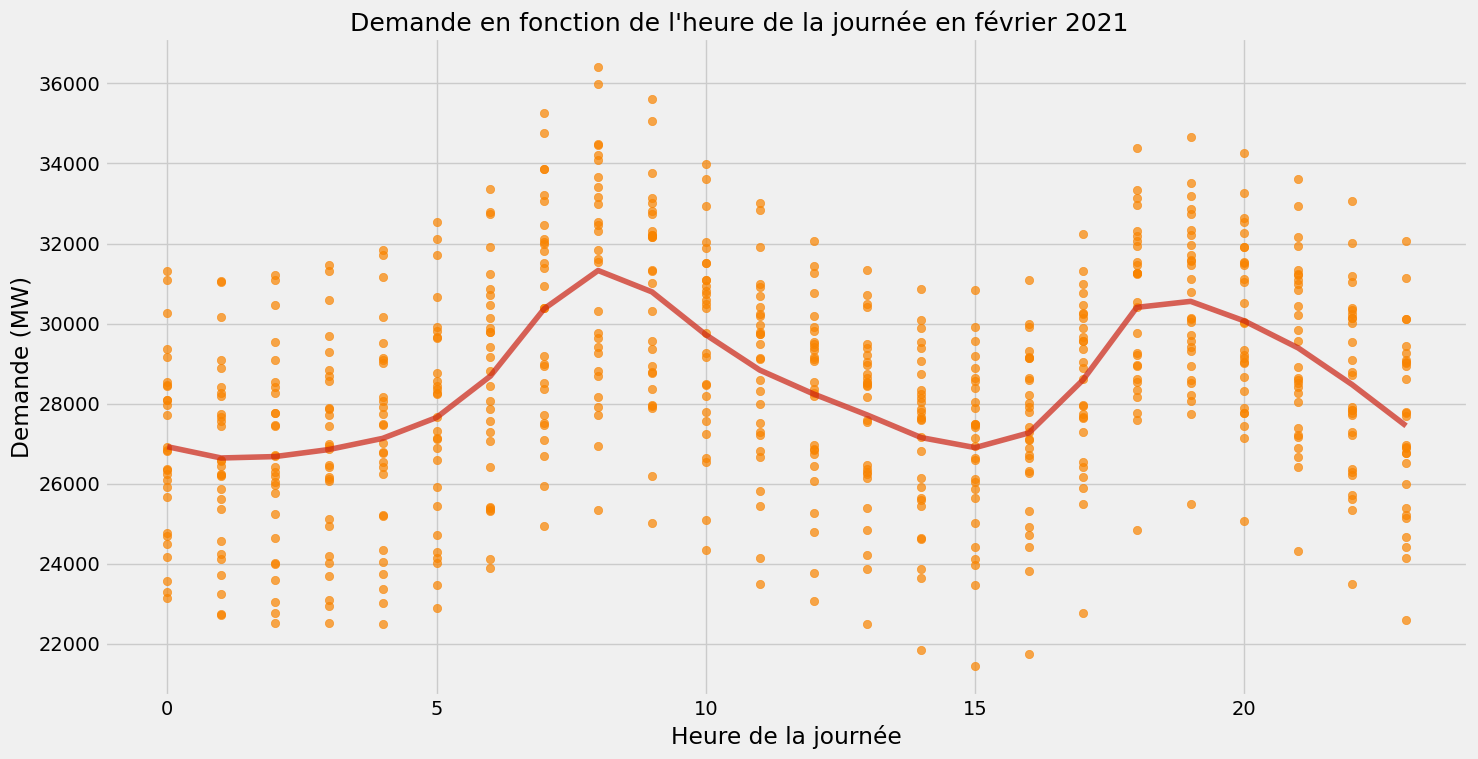

In [22]:
# Visualisation demande en fonction de l'heure pour février 2021
fig, ax1 = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(15)

ax1.scatter(
    x=df_fev.Heures,
    y=df_fev.MW,
    alpha=0.7,
    color=colors_pal[3],
)
ax1.plot(
    df_fev.groupby("Heures")["MW"].mean(),
    alpha=0.7,
    color=colors_pal[6],
)

plt.suptitle(
    "Demande en fonction de l'heure de la journée en février 2021",
    y=0.95,
    fontsize=18,
)
ax1.set_xlabel("Heure de la journée")
ax1.set_ylabel("Demande (MW)")
fig.tight_layout()
plt.show()

### Analyse de la période estivale

Intéressons-nous au mois de juillet 2021 pour analyser visuellement 

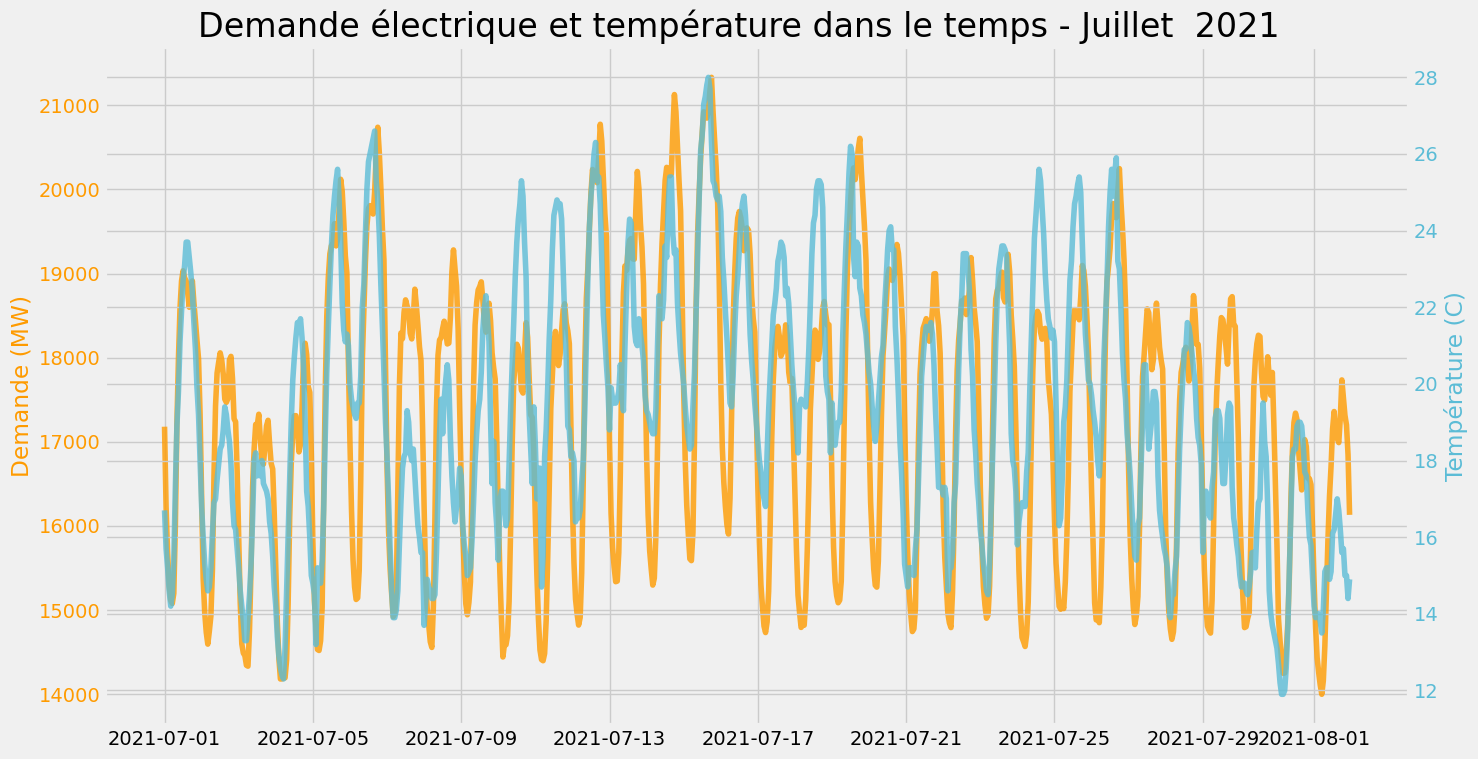

In [23]:
line_demande_temp(
    df=df_import["20210701":"20210801"],
    fin_titre="Juillet  2021",
)

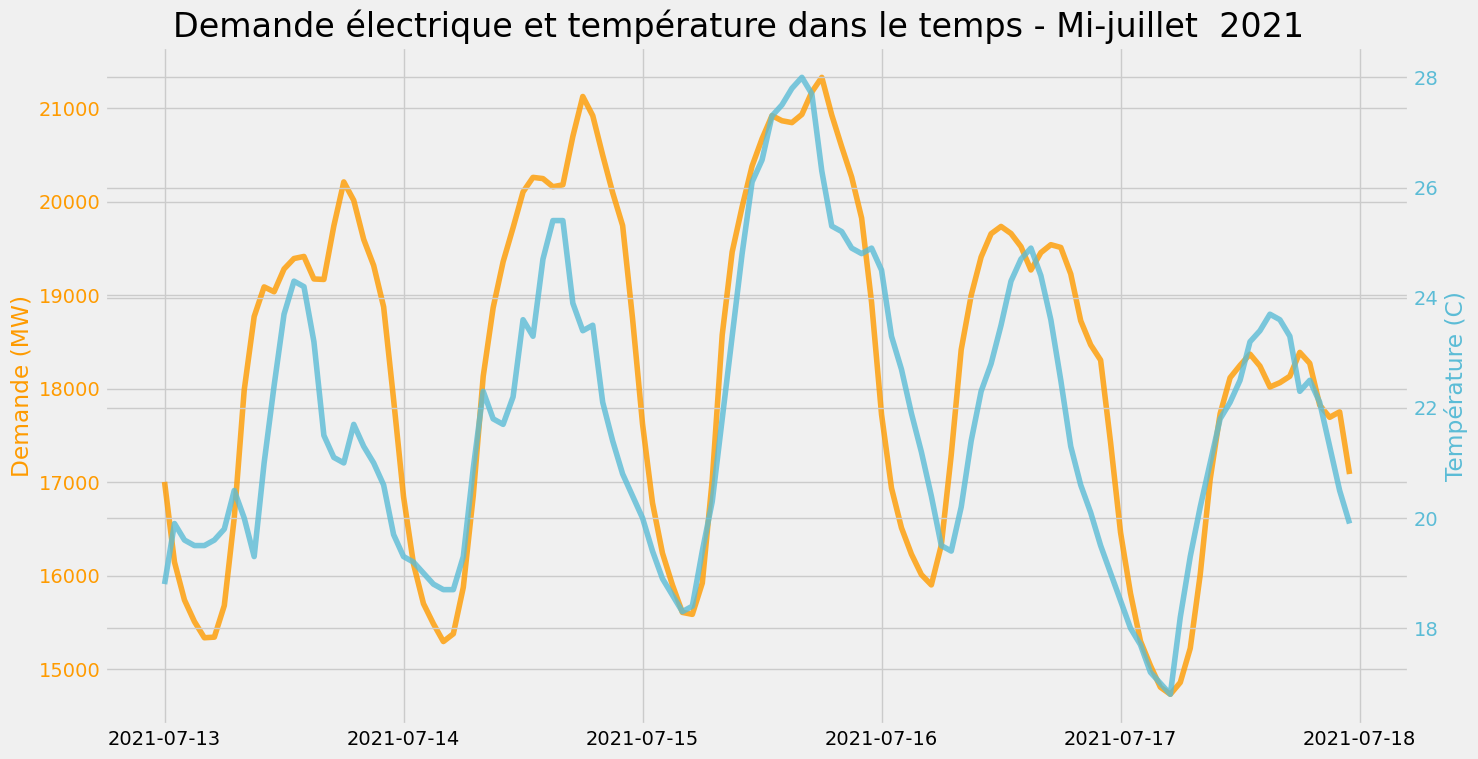

In [24]:
line_demande_temp(
    df=df_import["20210713":"20210717"],
    fin_titre="Mi-juillet  2021",
)

Nous pouvons bien voir que la température est directement corrélée avec la demande électrique dans la période la plus chaude de l'année.

Il faut aussi réaliser que la température elle-même est corrélée en fonction de l'heure de la journée (normalement, il fait plus chaud le jour que la nuit). 

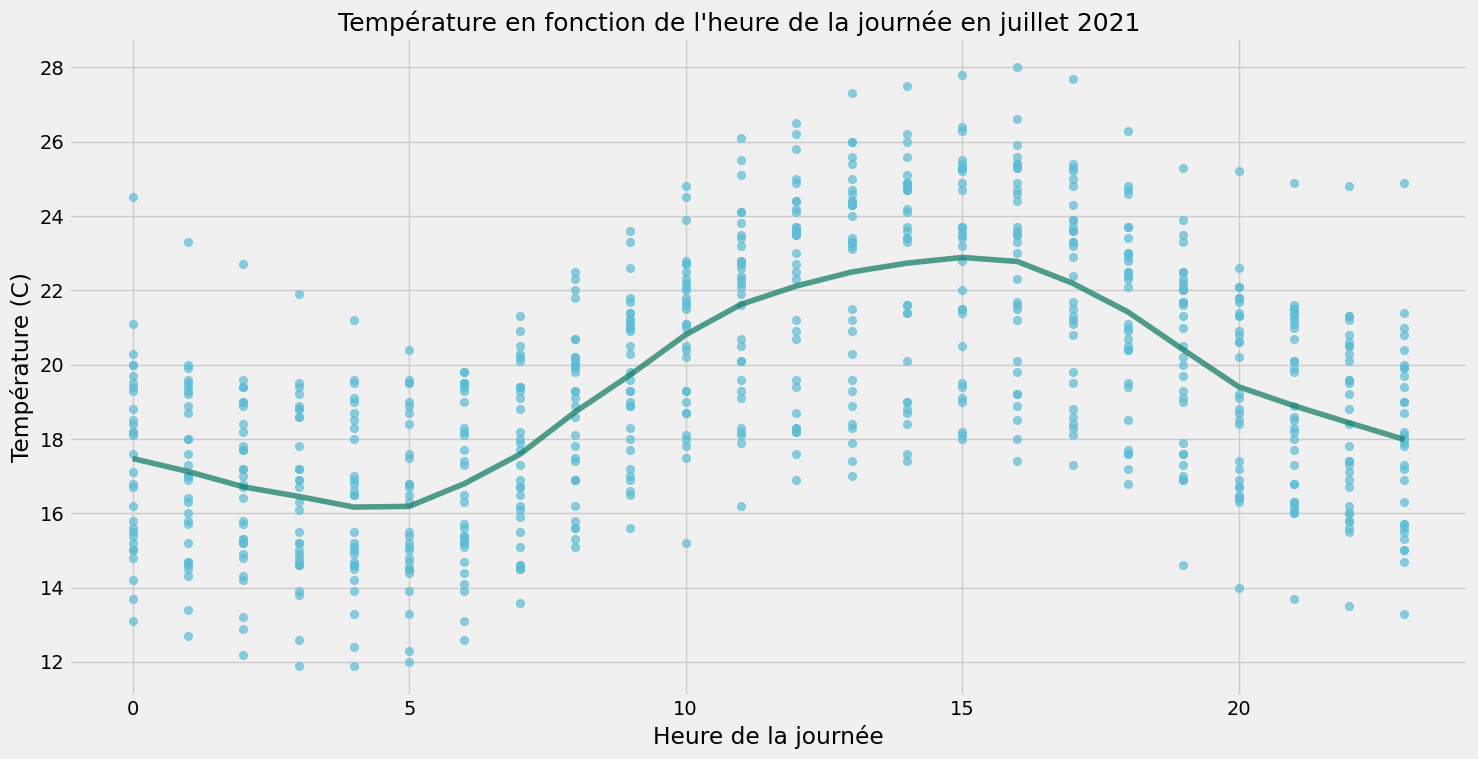

In [25]:
# Visualisation température en fonction de l'heure pour juillet 2021

df_juillet = df_import["20210701":"20210731"].copy()

df_juillet["Heures"] = df_juillet.index.hour

fig, ax1 = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(15)

ax1.scatter(
    x=df_juillet.Heures,
    y=df_juillet.Temp,
    alpha=0.7,
    color=colors_pal[4],
)
ax1.plot(
    df_juillet.groupby("Heures")["Temp"].mean(),
    alpha=0.7,
    color=colors_pal[9],
)

plt.suptitle(
    "Température en fonction de l'heure de la journée en juillet 2021",
    y=0.95,
    fontsize=18,
)
ax1.set_xlabel("Heure de la journée")
ax1.set_ylabel("Température (C)")
fig.tight_layout()
plt.show()

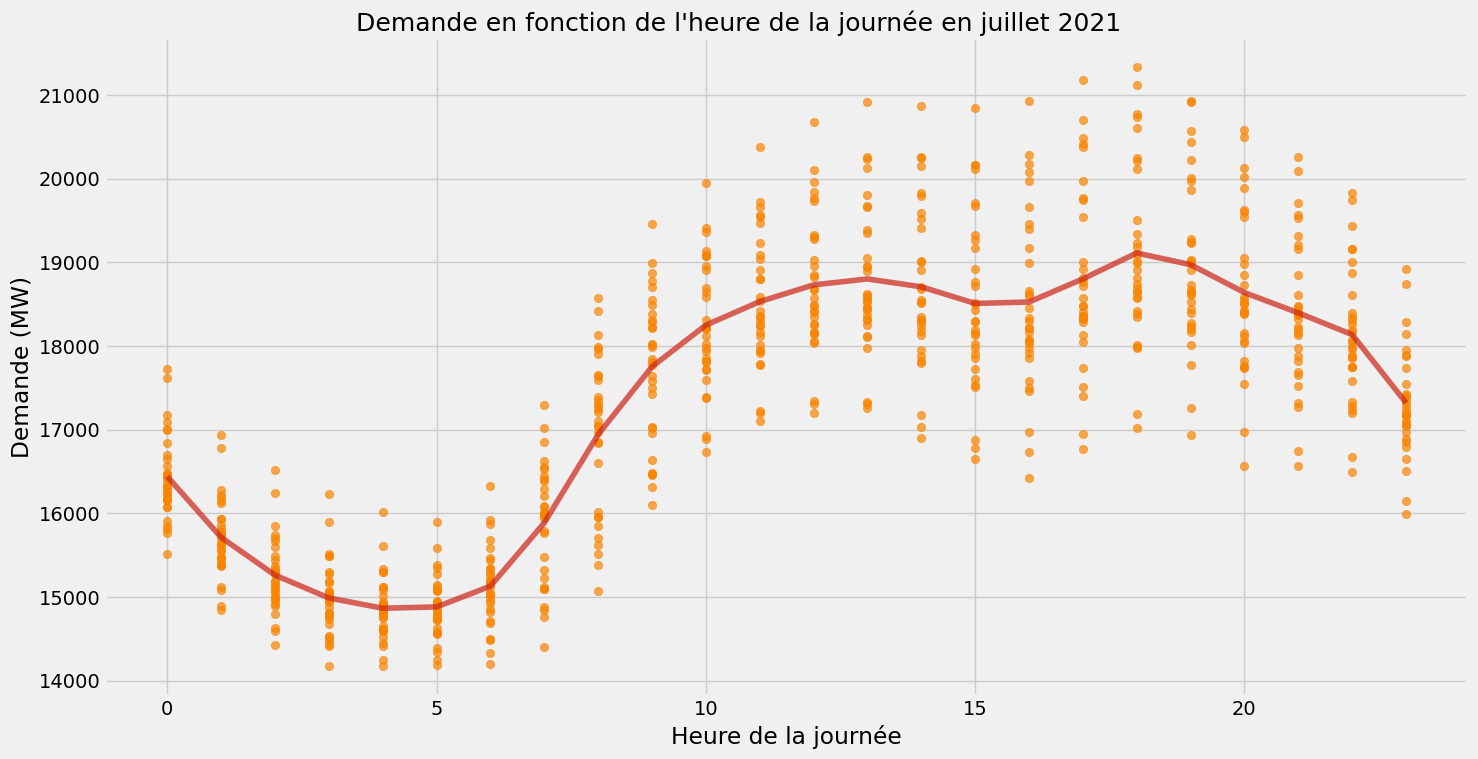

In [26]:
# Visualisation demande en fonction de l'heure pour juillet 2021
fig, ax1 = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(15)

ax1.scatter(
    x=df_juillet.Heures,
    y=df_juillet.MW,
    alpha=0.7,
    color=colors_pal[3],
)
ax1.plot(
    df_juillet.groupby("Heures")["MW"].mean(),
    alpha=0.7,
    color=colors_pal[6],
)

plt.suptitle(
    "Demande en fonction de l'heure de la journée en juillet 2021",
    y=0.95,
    fontsize=18,
)
ax1.set_xlabel("Heure de la journée")
ax1.set_ylabel("Demande (MW)")
fig.tight_layout()
plt.show()

Nous comprenons donc que la demande électrique est corrélée avec la température qui est elle-même corrélée en fonction de l'heure de la journée.  D'autres éléments comme le mois de l'année auront probablement le même genre d'impact. 

Nous devrons donc nous intéresser à ces sources de *features* lors de nos analyses subséquentes. 

### Comparaison de la demande par heure - Été vs Hiver

Intéressons-nous aux différences entre les pointes horaires en été (juillet) et en hiver (février).

In [27]:
df_comp = pd.DataFrame()
df_comp["Demande Moyenne Été"] = df_juillet.groupby(
    "Heures"
)["MW"].mean()
df_comp["Demande Moyenne Hiver"] = df_fev.groupby(
    "Heures"
)["MW"].mean()

In [28]:
df_comp.head()

Demande Moyenne Été  Demande Moyenne Hiver
Heures                                            
0              16441.205161           26925.416071
1              15714.020968           26642.932500
2              15262.738387           26677.942143
3              14989.861613           26853.581071
4              14866.517097           27132.755714

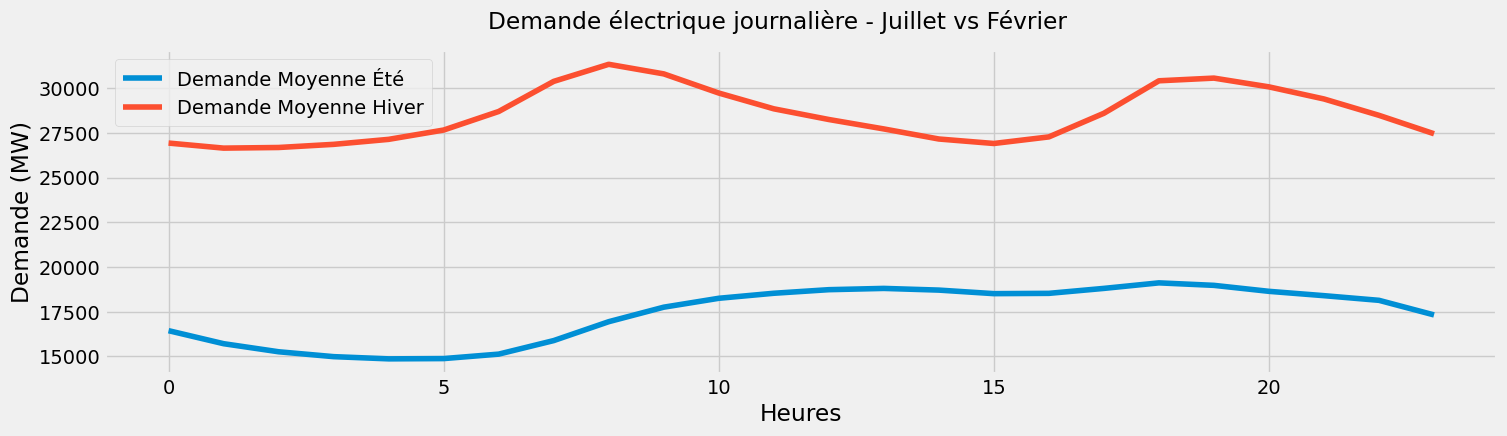

In [29]:
df_comp.plot(
    ylabel="Demande (MW)",
    figsize=(16, 4),
    linestyle="-",
)
plt.suptitle(
    "Demande électrique journalière - Juillet vs Février"
)
plt.show()

Nous pouvons voir que la double pointe d'hiver (vers 7-8h  le matin et 17h le soir) n'est pas la même qu'en été, où la consommation augmente et se maintien de façon plus stable durant toutes les heures du jour. 

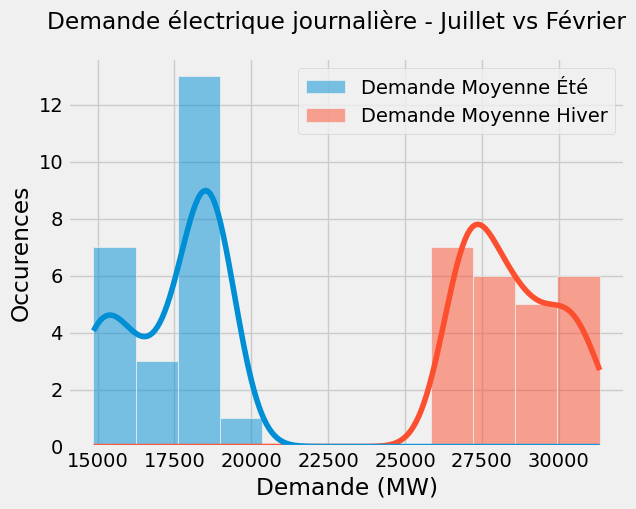

In [30]:
sns.histplot(data=df_comp, bins=12, kde=True)
plt.suptitle(
    "Demande électrique journalière - Juillet vs Février"
)
plt.xlabel("Demande (MW)")
plt.ylabel("Occurences")
plt.show()

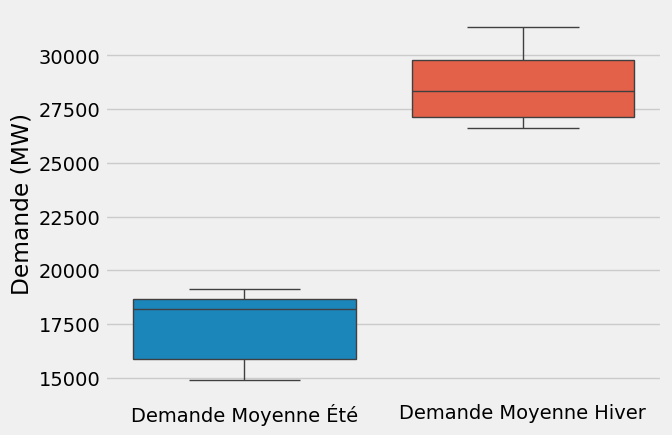

In [31]:
sns.boxplot(data=df_comp)
plt.ylabel("Demande (MW)")
plt.show()

## Température et demande en fonction des mois

## Température

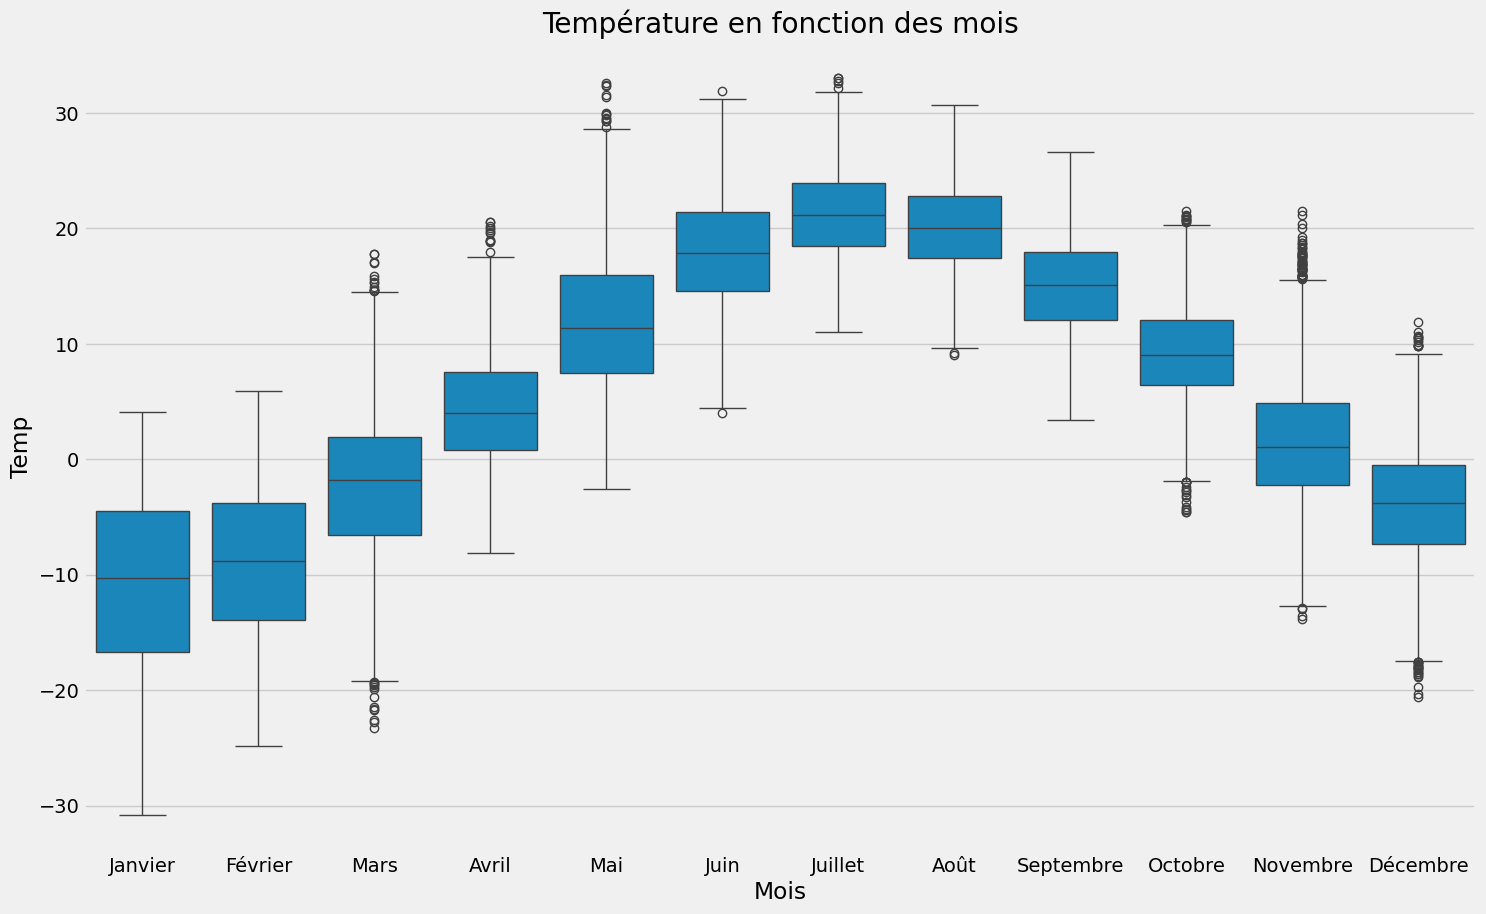

In [32]:
plt.figure(figsize=(16, 10))
ax = sns.boxplot(
    data=df.reset_index(drop=True), x="Mois", y="Temp"
)
ax.set_title("Température en fonction des mois")
plt.show()

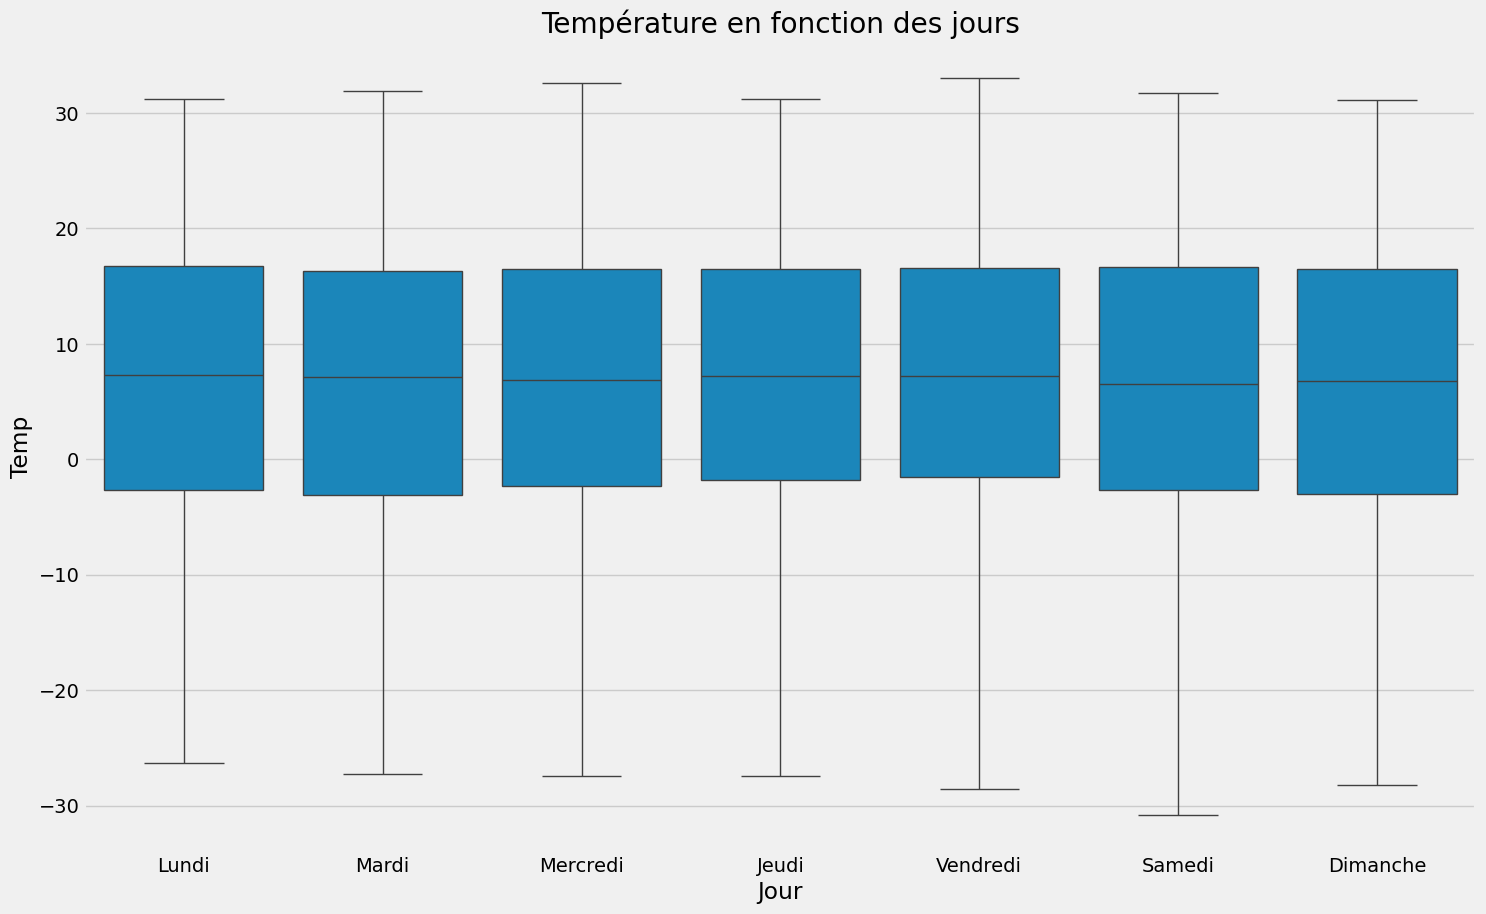

In [33]:
plt.figure(figsize=(16, 10))
ax = sns.boxplot(
    data=df.reset_index(drop=True),
    x="Jour",
    y="Temp",
    order=calendar.day_name,
)
ax.set_title("Température en fonction des jours")
plt.show()

Nous pouvons bien voir que qu'il n'y a aucun impact du jour de la semaine sur la température. 

### Demande

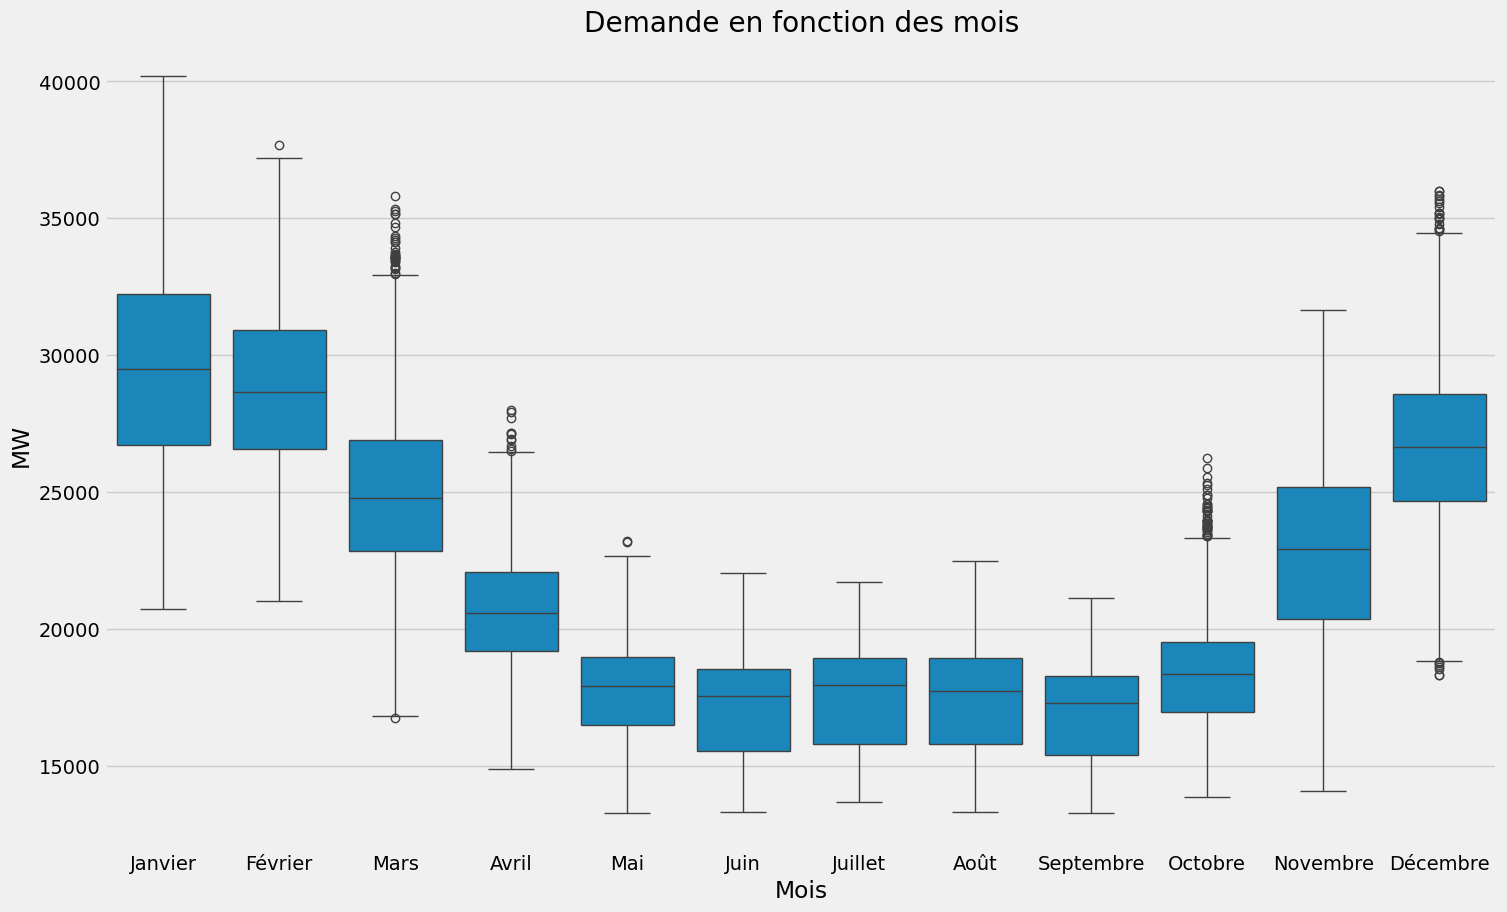

In [34]:
plt.figure(figsize=(16, 10))
ax = sns.boxplot(
    data=df.reset_index(drop=True), x="Mois", y="MW"
)
ax.set_title("Demande en fonction des mois")
plt.show()

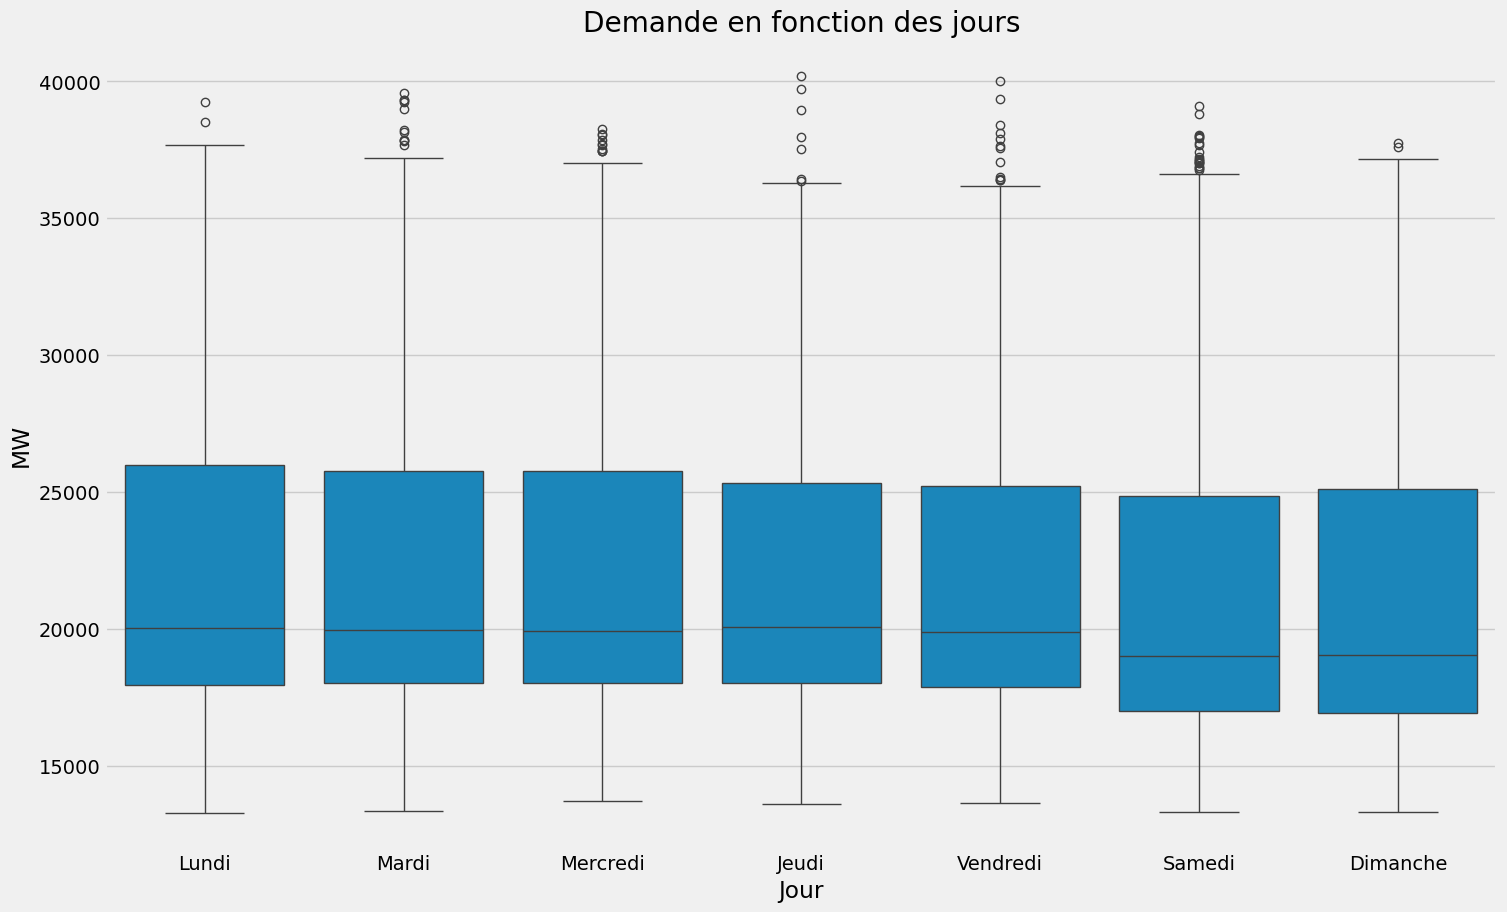

In [35]:
plt.figure(figsize=(16, 10))
ax = sns.boxplot(
    data=df.reset_index(drop=True),
    x="Jour",
    y="MW",
    order=calendar.day_name,
)
ax.set_title("Demande en fonction des jours")
plt.show()

Nous pouvons voir les mois de l'année ont un impact important sur la demande électrique, mais que les jours de la semaine sont plutôt constants, même si nous pouvons remarquer une légère variation intra-hebdomadaire : le samedi et le dimanche sont plus bas. 

Nous remarquons qu'il y a plus de valeurs aberrantes dans les mi-saisons (printemps, automne) qu'en plein hiver ou au cœur de l'été. 

# Tendances, hypothèses et conclusions

Après cette analyse préliminaire, nous avons bien pu apprendre à connaître nos données

- Nous avons quelques données manquantes dans la demande électrique ;
- Les heures de nuit, la demande en MW diminue généralement, probablement causé par la diminution de l'utilisation industrielle, commercial et des ménages ;
- Mais il faut aussi le plus chaud durant la journée vs la nuit en été, et plus froid en hiver.  L'heure du jour a donc aussi un impact, et ce, à l'année.
- En hiver, la corrélation est inversée avec la température ;
- En été, la climatisation a un impact : la corrélation est directe ;
- La différence de température par rapport à une température de confort, ou delta T de la température en base 18 ou 21, sera plus intéressant que la température elle-même : elle permet de linéariser la relation Temp-MW.
  